## Load modules

In [243]:
# -*- coding: utf-8 -*-
from pathlib import Path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize
import scipy.optimize
#from scipy.ndimage import gaussian_filter1d
import sys

## Parameters

In [244]:
date = '20211126'
dataNo = 3
scanNo = 3

## Data Preparation

In [245]:
path = r"./"+date
path_img = path + r"/data" + str('%03d' % dataNo) + "/raw"
path_scan = path + r"/scandir/Scan" + str('%03d' % scanNo) + '.txt'
path_param = path + r"/scandir/Parameters" + str('%03d' % scanNo) + '.txt'
scan_data = pd.read_csv(path_scan, delimiter='\t')

Analysis area
--

In [246]:
cx = 55
cy = 63
wx = 4
wy = 4
x0 = cx-wx; x1 = cx+wx
y0 = cy-wy; y1 = cy+wy
x=np.arange(x0,x1)
y=np.arange(y0,y1)
xmesh, ymesh = np.meshgrid(x,y)

r1_cx = cx+12
r1_cy = cy-1
r1_wx = 4
r1_wy = 4
r1_x0 = r1_cx-r1_wx; r1_x1 = r1_cx+r1_wx
r1_y0 = r1_cy-r1_wy; r1_y1 = r1_cy+r1_wy
r1_x=np.arange(r1_x0,r1_x1)
r1_y=np.arange(r1_y0,r1_y1)
r1_xmesh, r1_ymesh = np.meshgrid(r1_x,r1_y)

r2_cx = cx-12
r2_cy = cy+1
r2_wx = 4
r2_wy = 4
r2_x0 = r2_cx-r2_wx; r2_x1 = r2_cx+r2_wx
r2_y0 = r2_cy-r2_wy; r2_y1 = r2_cy+r2_wy
r2_x=np.arange(r2_x0,r2_x1)
r2_y=np.arange(r2_y0,r2_y1)
r2_xmesh, r2_ymesh = np.meshgrid(r2_x,r2_y)


## Sample images

In [247]:
scan_param = scan_data['A0144: LS final amplitude 1']
sample1 = -8 
sample2 = -0 
sample3 = 7
unit = '[V]'

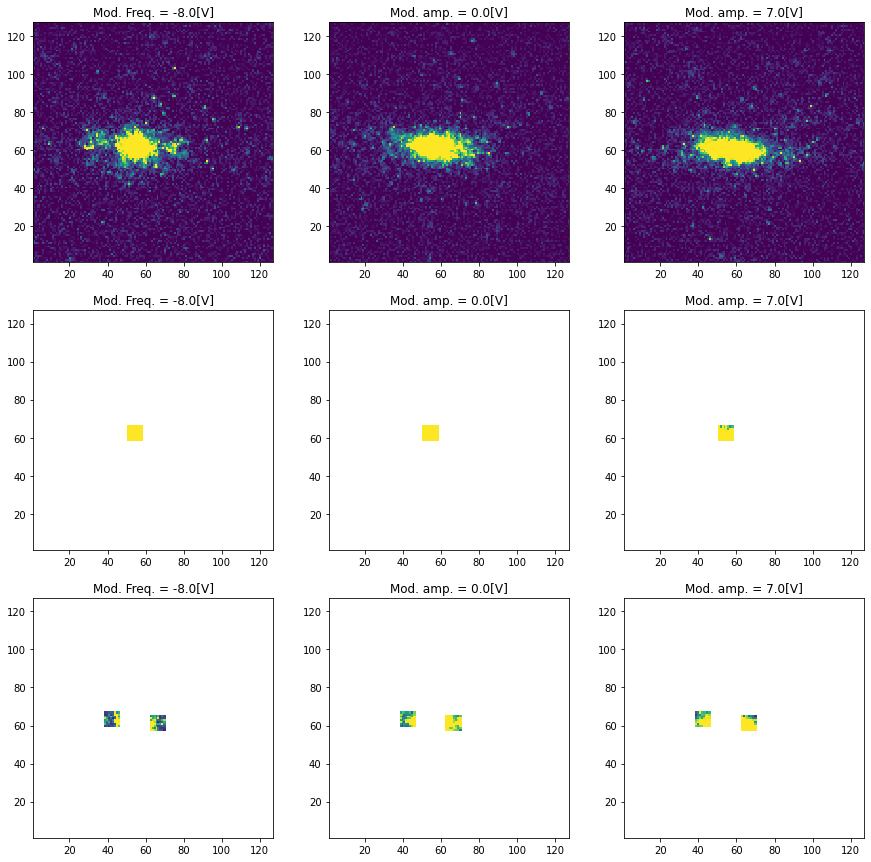

In [248]:

share = Path(path_img)
if share.exists():
    trans_files = list(Path(path_img).glob('seq*_trans001.tiff'))
    flat_files = list(Path(path_img).glob('seq*_flat001.tiff'))
    update_files = list(Path(path_img).glob('seq*_update001.tiff'))
else:
    print(No)

img_flat_ave =[]
img_trans_ave = []
for N in range(len(trans_files)):
    img_flat_ave += [np.array(Image.open(flat_files[N]))]
    img_trans_ave += [np.array(Image.open(trans_files[N]))]
img_flat_ave = np.average(img_flat_ave,axis=0)
img_trans_ave =np.average(img_trans_ave,axis=0) -img_flat_ave


img_trans_sample1 = []
img_trans_sample2 = []
img_trans_sample3 = []
for N in range(len(trans_files)):
    if scan_param[N] == sample1:
        img_trans_sample1 += [np.array(Image.open(trans_files[N]))]
    elif scan_param[N] == sample2:
        img_trans_sample2 += [np.array(Image.open(trans_files[N]))]
    elif scan_param[N] == sample3:
        img_trans_sample3 += [np.array(Image.open(trans_files[N]))]
img_trans_sample1 = np.average(img_trans_sample1,axis=0) -img_flat_ave
img_trans_sample2 = np.average(img_trans_sample2,axis=0) -img_flat_ave
img_trans_sample3 = np.average(img_trans_sample3,axis=0) -img_flat_ave

fig =plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(3,3,1)
mappable =ax1.pcolormesh(img_trans_sample1, vmin=0, vmax=5000, shading='auto')
ax1.set_aspect('equal')
ax1.set_xlim(1,127)
ax1.set_ylim(1,127)
ax1.set_title("Mod. Freq. = %.01f"%(sample1)+unit)

ax2 = fig.add_subplot(3,3,2)
mappable =ax2.pcolormesh(img_trans_sample2, vmin=0, vmax=5000, shading='auto')
ax2.set_aspect('equal')
ax2.set_xlim(1,127)
ax2.set_ylim(1,127)
ax2.set_title("Mod. amp. = %.01f"%(sample2)+unit)

ax3 = fig.add_subplot(3,3,3)
mappable =ax3.pcolormesh(img_trans_sample3, vmin=0, vmax=5000, shading='auto')
ax3.set_aspect('equal')
ax3.set_xlim(1,127)
ax3.set_ylim(1,127)
ax3.set_title("Mod. amp. = %.01f"%(sample3)+unit)

ax4 = fig.add_subplot(3,3,4)
mappable =ax4.pcolormesh(xmesh,ymesh,img_trans_sample1[y0:y1,x0:x1], vmin=0, vmax=5000, shading='auto')
ax4.set_aspect('equal')
ax4.set_xlim(1,127)
ax4.set_ylim(1,127)
ax4.set_title("Mod. Freq. = %.01f"%(sample1)+unit)

ax5 = fig.add_subplot(3,3,5)
mappable =ax5.pcolormesh(xmesh,ymesh,img_trans_sample2[y0:y1,x0:x1], vmin=0, vmax=5000, shading='auto')
ax5.set_aspect('equal')
ax5.set_xlim(1,127)
ax5.set_ylim(1,127)
ax5.set_title("Mod. amp. = %.01f"%(sample2)+unit)

ax6 = fig.add_subplot(3,3,6)
mappable =ax6.pcolormesh(xmesh,ymesh,img_trans_sample3[y0:y1,x0:x1], vmin=0, vmax=5000, shading='auto')
ax6.set_aspect('equal')
ax6.set_xlim(1,127)
ax6.set_ylim(1,127)
ax6.set_title("Mod. amp. = %.01f"%(sample3)+unit)

ax7 = fig.add_subplot(3,3,7)
mappable =ax7.pcolormesh(r1_xmesh,r1_ymesh,img_trans_sample1[r1_y0:r1_y1,r1_x0:r1_x1], vmin=0, vmax=5000, shading='auto')
ax7.pcolormesh(r2_xmesh,r2_ymesh,img_trans_sample1[r2_y0:r2_y1,r2_x0:r2_x1], vmin=0, vmax=5000, shading='auto')
ax7.set_aspect('equal')
ax7.set_xlim(1,127)
ax7.set_ylim(1,127)
ax7.set_title("Mod. Freq. = %.01f"%(sample1)+unit)

ax8 = fig.add_subplot(3,3,8)
mappable =ax8.pcolormesh(r1_xmesh,r1_ymesh,img_trans_sample2[r1_y0:r1_y1,r1_x0:r1_x1], vmin=0, vmax=5000, shading='auto')
ax8.pcolormesh(r2_xmesh,r2_ymesh,img_trans_sample2[r2_y0:r2_y1,r2_x0:r2_x1], vmin=0, vmax=5000, shading='auto')
ax8.set_aspect('equal')
ax8.set_xlim(1,127)
ax8.set_ylim(1,127)
ax8.set_title("Mod. amp. = %.01f"%(sample2)+unit)

ax9 = fig.add_subplot(3,3,9)
mappable =ax9.pcolormesh(r1_xmesh,r1_ymesh,img_trans_sample3[r1_y0:r1_y1,r1_x0:r1_x1], vmin=0, vmax=5000, shading='auto')
ax9.pcolormesh(r2_xmesh,r2_ymesh,img_trans_sample3[r2_y0:r2_y1,r2_x0:r2_x1], vmin=0, vmax=5000, shading='auto')
ax9.set_aspect('equal')
ax9.set_xlim(1,127)
ax9.set_ylim(1,127)
ax9.set_title("Mod. amp. = %.01f"%(sample3)+unit)


plt.show()

## Analysis

In [249]:
scan_param = scan_data['A0144: LS final amplitude 1']
flcount = scan_data['Total count1 @ ROI1 (arb. u.)']

In [250]:
# img_trans_list =[]
contrast_list=[]
for N in range(len(trans_files)):
    img_trans_temp = [np.array(Image.open(trans_files[N])) -img_flat_ave  ]
    # img_trans_list +=[np.sum(img_trans_temp[0][y0:y1,x0:x1])/np.sum(img_trans_temp)]
    # contrast_list +=[(np.sum(img_trans_temp[0][y0:y1,x0:x1]) -np.sum(img_trans_temp[0][r1_y0:r1_y1,r1_x0:r1_x1])-np.sum(img_trans_temp[0][r2_y0:r2_y1,r2_x0:r2_x1]))/np.sum(img_trans_temp)]
    contrast_list +=[(np.sum(img_trans_temp[0][y0:y1,x0:x1]) -np.sum(img_trans_temp[0][r1_y0:r1_y1,r1_x0:r1_x1])-np.sum(img_trans_temp[0][r2_y0:r2_y1,r2_x0:r2_x1]))/(np.sum(img_trans_temp[0][y0:y1,x0:x1]) +np.sum(img_trans_temp[0][r1_y0:r1_y1,r1_x0:r1_x1])+np.sum(img_trans_temp[0][r2_y0:r2_y1,r2_x0:r2_x1]))]

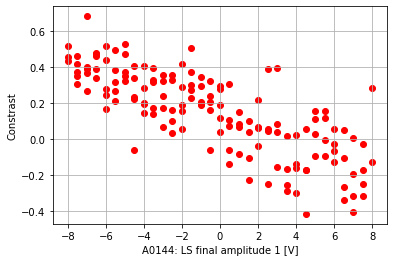

In [256]:
plt.scatter(scan_param,contrast_list, label='Data',c="r")
plt.xlabel('A0144: LS final amplitude 1 [V]')
plt.ylabel('Constrast')
plt.grid()